original samples:
[[1, 1, 1], [1, 2, 2], [1, 3, 3], [1, 4, 4], [1, 5, 5]]
scaled samples:
[[1.0, 0.0, 0.0], [1.0, 0.2, 0.2], [1.0, 0.4, 0.4], [1.0, 0.6, 0.6], [1.0, 0.8, 0.8]]
[0, 0, 0]
hyp  0.060000  y 2.000000 
hyp  0.072800  y 4.000000 
hyp  0.085600  y 6.000000 
hyp  0.098400  y 8.000000 
hyp  0.111200  y 10.000000 
[0.06, 0.032, 0.032]
[0.06, 0.032, 0.032]
hyp  0.119144  y 2.000000 
hyp  0.144587  y 4.000000 
hyp  0.170029  y 6.000000 
hyp  0.195472  y 8.000000 
hyp  0.220914  y 10.000000 
[0.119144, 0.06360640000000001, 0.06360640000000001]
samples:
[[1.0, 0.0, 0.0], [1.0, 0.2, 0.2], [1.0, 0.4, 0.4], [1.0, 0.6, 0.6], [1.0, 0.8, 0.8]]
final params:
[0.119144, 0.06360640000000001, 0.06360640000000001]


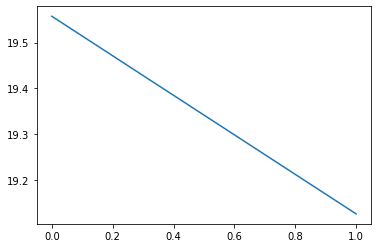

In [1]:
import numpy  #numpy is used to make some operrations with arrays more easily


__errors__= [];  #global variable to store the errors/loss for visualisation

def h(params, sample):
	"""This evaluates a generic linear function h(x) with current parameters.  h stands for hypothesis

	Args:
		params (lst) a list containing the corresponding parameter for each element x of the sample
		sample (lst) a list containing the values of a sample 

	Returns:
		Evaluation of h(x)
	"""
	acum = 0
	for i in range(len(params)):
		acum = acum + params[i]*sample[i]  #evaluates h(x) = a+bx1+cx2+ ... nxn.. 
	return acum;


def show_errors(params, samples,y):
	"""Appends the errors/loss that are generated by the estimated values of h and the real value y
	
	Args:
		params (lst) a list containing the corresponding parameter for each element x of the sample
		samples (lst) a 2 dimensional list containing the input samples 
		y (lst) a list containing the corresponding real result for each sample
	
	"""
	global __errors__
	error_acum =0
#	print("transposed samples") 
#	print(samples)
	for i in range(len(samples)):
		hyp = h(params,samples[i])
		print( "hyp  %f  y %f " % (hyp,  y[i]))   
		error=hyp-y[i]
		error_acum=+error**2 # this error is the original cost function, (the one used to make updates in GD is the derivated verssion of this formula)
	mean_error_param=error_acum/len(samples)
	__errors__.append(mean_error_param)







def GD(params, samples, y, alfa):
	"""Gradient Descent algorithm 
	Args:
		params (lst) a list containing the corresponding parameter for each element x of the sample
		samples (lst) a 2 dimensional list containing the input samples 
		y (lst) a list containing the corresponding real result for each sample
		alfa(float) the learning rate
	Returns:
		temp(lst) a list with the new values for the parameters after 1 run of the sample set
	"""
	temp = list(params)
	general_error=0
	for j in range(len(params)):
		acum =0; error_acum=0
		for i in range(len(samples)):
			error = h(params,samples[i]) - y[i]
			acum = acum + error*samples[i][j]  #Sumatory part of the Gradient Descent formula for linear Regression.
		temp[j] = params[j] - alfa*(1/len(samples))*acum  #Subtraction of original parameter value with learning rate included.
	return temp







def scaling(samples):
	"""Normalizes sample values so that gradient descent can converge
	Args:
		params (lst) a list containing the corresponding parameter for each element x of the sample
	Returns:
		samples(lst) a list with the normalized version of the original samples
	"""
	acum =0
	samples = numpy.asarray(samples).T.tolist() 
	for i in range(1,len(samples)):	
		for j in range(len(samples[i])):
			acum=+ samples[i][j]
		avg = acum/(len(samples[i]))
		max_val = max(samples[i])
		#print("avg %f" % avg)
		#print(max_val)
		for j in range(len(samples[i])):
			#print(samples[i][j])
			samples[i][j] = (samples[i][j] - avg)/max_val  #Mean scaling
	return numpy.asarray(samples).T.tolist()


#  univariate example
#params = [0,0]
#samples = [1,2,3,4,5]
#y = [2,4,6,8,10]

#  multivariate example trivial
params = [0,0,0]
samples = [[1,1],[2,2],[3,3],[4,4],[5,5]]
y = [2,4,6,8,10]


#  multivariate example
#params = [0,0,0]
#samples = [[1,1],[2,2],[3,3],[4,4],[5,5],[2,2],[3,3],[4,4]]
#y = [2,4,6,8,10,2,5.5,16]

alfa =.01  #  learning rate
for i in range(len(samples)):
	if isinstance(samples[i], list):
		samples[i]=  [1]+samples[i]
	else:
		samples[i]=  [1,samples[i]]
print ("original samples:")
print (samples)
samples = scaling(samples)
print ("scaled samples:")
print (samples)


epochs = 0

while True:  #  run gradient descent until local minima is reached
	oldparams = list(params)
	print (params)
	params=GD(params, samples,y,alfa)	
	show_errors(params, samples, y)  #only used to show errors, it is not used in calculation
	print (params)
	epochs = epochs + 1
	if(oldparams == params or epochs == 2):   #  local minima is found when there is no further improvement
		print ("samples:")
		print(samples)
		print ("final params:")
		print (params)
		break

import matplotlib.pyplot as plt  #use this to generate a graph of the errors/loss so we can see whats going on (diagnostics)
plt.plot(__errors__)
plt.show()